In [23]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.metrics import r2_score
from sklearn import svm
from sklearn import preprocessing

## Reading the Data 

In [18]:
df = pd.read_csv('StockX-ML-Data.csv', parse_dates=True)

df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Percent Change,Days Since Release,Original Release
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,9/24/16,11.0,California,398.636364,1665,0
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,11/23/16,11.0,California,211.363636,1605,0
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,11/23/16,11.0,California,213.636364,1605,0
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,11/23/16,11.5,Kentucky,388.636364,1605,0
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2/11/17,11.0,Rhode Island,276.363636,1525,0


## Data Preprocessing

In [19]:
# Label encoding the states to have values from 0 - 49
# Instatniate LabelEncoder
label_encoder = LabelEncoder()

# LabelEncode
df['Buyer Region'] = label_encoder.fit_transform(df['Buyer Region']) # CA, NY, etc.
df['Color'] = label_encoder.fit_transform(df['Sneaker Name']) # Colorway
df['Brand'] = label_encoder.fit_transform(df['Brand']) # Yeezy, Nike


In [20]:
# Parsing data times and creating month column
df['Order Date'] = pd.to_datetime(df['Order Date'], infer_datetime_format=True)
df['Month'] = pd.DatetimeIndex(df['Order Date']).month
df['Year'] = pd.DatetimeIndex(df['Order Date']).year

# Inspecting newly created 
# df.head()

## Data Visualization

## Linear Regression
#### Given a shoe's information, can we predict its resale price?

In [5]:
# Retrieving feature data and target variable
X = df[['Brand', 'Retail Price', 'Shoe Size', 'Buyer Region', 'Color', "Days Since Release", "Original Release", 'Month', 'Year']]

y = df['Sale Price']

# Splitting data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Linear Regression

Plain old linear regression to start us off.

In [6]:
def linregression_model(X_train, y_train, X_test, y_test):
    linear_regression = LinearRegression()
    linear_regression.fit(X_train, y_train.ravel())
    y_hat_train = linear_regression.predict(X_train)
    acc_train = r2_score(y_train, y_hat_train)
    print("Accuracy on training data (r^2): %f" % acc_train)
    y_hat_test = linear_regression.predict(X_test)
    acc_test = r2_score(y_test, y_hat_test)
    print("Accuracy on testing data (r^2): %f" % acc_test)
    print()

In [7]:
linregression_model(X_train, y_train, X_test, y_test)

Accuracy on training data (r^2): 0.451954
Accuracy on testing data (r^2): 0.448954



## Linear Regression using Lasso Regularization

We will set it up so that it takes in different cost values

In [8]:
acc_train_lassoreg = [] 
acc_test_lassoreg = []
c_lassoreg = []

def lassoregression_model(C, X_train, y_train, X_test, y_test):
    lassoreg = Lasso(alpha=C)
    lassoreg.fit(X_train, y_train.ravel())
    y_hat_train = lassoreg.predict(X_train)
    acc_train = r2_score(y_train, y_hat_train)
    acc_train_lassoreg.append(acc_train)
    print("Alpha = ", c)
    print("Accuracy on training data (r^2): %f" % acc_train)
    y_hat_test = lassoreg.predict(X_test)
    acc_test = r2_score(y_test, y_hat_test)
    acc_test_lassoreg.append(acc_test)
    print("Accuracy on testing data (r^2): %f" % acc_test)
    print()
    c_lassoreg.append(C)

In [21]:
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10]
for c in cVals:
    lassoregression_model(c, X_train, y_train, X_test, y_test)

Alpha =  0.0001
Accuracy on training data (r^2): 0.988443
Accuracy on testing data (r^2): 0.987928

Alpha =  0.001
Accuracy on training data (r^2): 0.988443
Accuracy on testing data (r^2): 0.987927

Alpha =  0.01
Accuracy on training data (r^2): 0.988441
Accuracy on testing data (r^2): 0.987923

Alpha =  0.1
Accuracy on training data (r^2): 0.988365
Accuracy on testing data (r^2): 0.987819

Alpha =  1
Accuracy on training data (r^2): 0.988065
Accuracy on testing data (r^2): 0.987440

Alpha =  10
Accuracy on training data (r^2): 0.985971
Accuracy on testing data (r^2): 0.985193



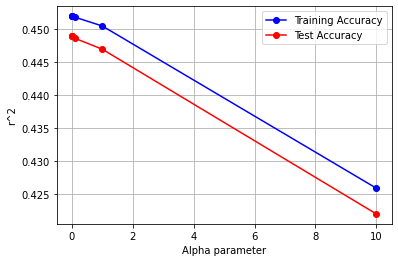

In [10]:
plt.plot(c_lassoreg, acc_train_lassoreg, 'bo-') 
plt.plot(c_lassoreg, acc_test_lassoreg,'ro-') 
plt.xlabel("Alpha parameter")
plt.ylabel("r^2")
plt.grid()

plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

## Linear Regression using Ridge Regularization

We will use the same alpha values as the previous lasso version

In [11]:
acc_train_ridgereg = []
acc_test_ridgereg = []
c_ridgereg = []

def ridgereg_model(C, X_train, y_train, X_test, y_test):
    ridgereg = Ridge(alpha=C)
    ridgereg.fit(X_train, y_train.ravel())
    y_hat_train = ridgereg.predict(X_train)
    acc_train = r2_score(y_train, y_hat_train)
    acc_train_ridgereg.append(acc_train)
    print("alpha = ", C)
    print("Accuracy on training data (r^2): %f" % acc_train)
    y_hat_test = ridgereg.predict(X_test)
    acc_test = r2_score(y_test, y_hat_test)
    acc_test_ridgereg.append(acc_test)
    print("Accuracy on testing data (r^2): %f" % acc_test)
    print()
    c_ridgereg.append(C)


In [12]:
for c in cVals:
    ridgereg_model(c, X_train, y_train, X_test, y_test)

alpha =  0.0001
Accuracy on training data (r^2): 0.451954
Accuracy on testing data (r^2): 0.448954

alpha =  0.001
Accuracy on training data (r^2): 0.451954
Accuracy on testing data (r^2): 0.448954

alpha =  0.01
Accuracy on training data (r^2): 0.451954
Accuracy on testing data (r^2): 0.448954

alpha =  0.1
Accuracy on training data (r^2): 0.451954
Accuracy on testing data (r^2): 0.448953

alpha =  1
Accuracy on training data (r^2): 0.451953
Accuracy on testing data (r^2): 0.448945

alpha =  10
Accuracy on training data (r^2): 0.451931
Accuracy on testing data (r^2): 0.448848



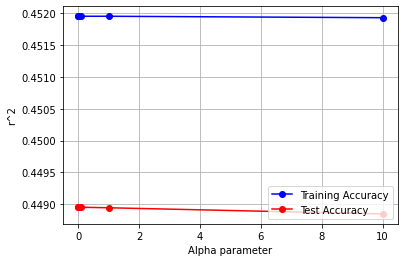

In [13]:
plt.plot(c_ridgereg, acc_train_ridgereg, 'bo-') 
plt.plot(c_ridgereg, acc_test_ridgereg,'ro-') 
plt.xlabel("Alpha parameter")
plt.ylabel("r^2")
plt.grid()

plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

## Logistic Regression

Given a shoe, can we predict if its resale price doubled in price (with respect to its original retail price)?


In [14]:
# Retrieving feature data and target variable
X = df[['Brand', 'Retail Price', 'Shoe Size', 'Buyer Region', 'Percent Change', 'Days Since Release', 'Original Release', 'Color', 'Month', 'Year']]

y = df['Sale Price']

# Splitting data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [15]:
# Instantiating a LogisticRegression instance
logistic_regression = LogisticRegression()

logistic_regression.fit( X_train, y_train )

y_hat_train = logistic_regression.predict( X_train )

print(y_hat_train)
print('Hi')

KeyboardInterrupt: 

## Support Vector Machine

Given the independent variables - can we predict what brand the sold shoe was?

## SVM using Linear Kernel

In [25]:
X = df[['Sale Price', 'Retail Price', 'Shoe Size', 
        'Buyer Region', 'Percent Change', 'Days Since Release', 
        'Original Release', 'Color', 'Month', 'Year']]

y = df['Brand']

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train = preprocessing.scale(X_train)

X_test = preprocessing.scale(X_test)

In [24]:
acc_train_svm_lin = []
acc_test_svm_lin = []
c_svm_lin = []

def svm_lin(c, X_train, y_train, X_test, y_test):
    svc_linear = svm.SVC(probability=False, kernel="linear", C=c)
    svc_linear.fit(X_train, y_train)
    y_hat_train = svc_linear.predict(X_train)
    acc_train = svc_linear.score(X_train, y_hat_train)
    acc_train_svm_lin.append(acc_train)
    print('Train Data Accuracy: {0:f}'.format(acc_train))
    y_hat_test = svc_linear.predict(X_test)
    acc_test = svc_linear.score(X_test, y_hat_test)
    acc_test_svm_lin.append(acc_test)
    print('Test Data Accuracy: {0:f}'.format(acc_test))
    print()
    c_svm_lin.append(c)


In [26]:
for c in cVals:
    svm_lin(c, X_train, y_train, X_test, y_test)

KeyboardInterrupt: 

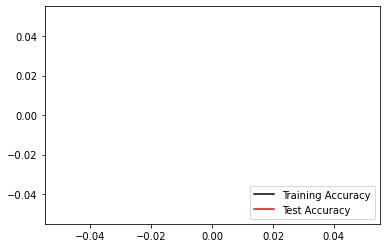

In [28]:
plt.plot(c_svm_lin, acc_train_svm_lin, c="black")
plt.plot(c_svm_lin, acc_test_svm_lin, c="red")

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

## SVM using Radial Basis Function (RBF) Kernel

In [27]:
acc_train_svm_rbf = []
acc_test_svm_rbf = []
c_svm_rbf = []

def svm_rbf(c, X_train, y_train, X_test, y_test):
    svc_rbf = svm.SVC(probability=False, kernel="rbf", C=c)
    svc_rbf.fit(X_train, y_train)
    y_hat_train = svc_rbf.predict(X_train)
    acc_train = svc_rbf.score(X_train, y_hat_train)
    acc_train_svm_rbf.append(acc_train)
    print('Train Data Accuracy: {0:f}'.format(acc_train))
    y_hat_test = svc_rbf.predict(X_test)
    acc_test = svc_rbf.score(X_test, y_hat_test)
    acc_test_rbf.append(acc_test)
    print('Test Data Accuracy: {0:f}'.format(acc_test))
    print()
    c_svm_rbf.append(c)

In [ ]:
for c in cVals:
    svm_rbf(c, X_train, y_train, X_test, y_test)

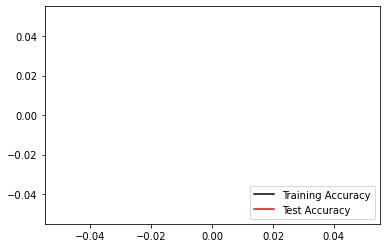

In [29]:
plt.plot(c_svm_rbf, acc_train_svm_rbf, c="black")
plt.plot(c_svm_rbf, acc_test_svm_rbf, c="red")

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

In [30]:
acc_train_svm_poly = []
acc_test_svm_poly = []
c_svm_poly = []

def svm_poly(c, X_train, y_train, X_test, y_test):
    pass

In [ ]:
cVals = np.geomspace(0.000001, 0.001, 6)
for c in cVals:
    svm_poly(c, X_train, y_train, X_test, y_test)

In [ ]:
plt.plot(c_svm_poly, acc_train_svm_poly, c="black")
plt.plot(c_svm_poly, acc_test_svm_poly, c="red")

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')